In [6]:
import pandas as pd

def parse_genre(genre_str):
    genre_str = genre_str.strip("[]")
    return [genre.strip("' ") for genre in genre_str.split(",")]

def load_data(file_path):
    """Load data from a CSV file into a DataFrame."""
    return pd.read_csv(file_path)

def convert_data_types(df):
    df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')
    df['Hours Viewed'] = pd.to_numeric(df['Hours Viewed'], errors='coerce')
    df['Number of Ratings'] = pd.to_numeric(df['Number of Ratings'], errors='coerce')
    df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
    return df

def standardize_and_clean_data(df):
    df['Available Globally?'] = df['Available Globally?'].map({'Yes': True, 'No': False})
    df['Genre'] = df['Genre'].apply(parse_genre)
    df['Key Words'] = df['Key Words'].str.strip()
    df['Description'] = df['Description'].str.strip()
    return df

def handle_missing_values(df):
    for column in ['Hours Viewed', 'Number of Ratings', 'Rating']:
        df[column].fillna(df[column].median(), inplace=True)
    df['Year'].fillna(-1, inplace=True)
    df['Month'].fillna(-1, inplace=True)
    df['Day'].fillna(-1, inplace=True)
    return df
    
def validate_data(df):
    return df[(df['Rating'].between(0, 10)) & (df['Hours Viewed'] >= 0) & (df['Number of Ratings'] >= 0)]

def extract_date_components(df):
    df['Year'] = df['Release Date'].dt.year
    df['Month'] = df['Release Date'].dt.month
    df['Day'] = df['Release Date'].dt.day
    return df

def detect_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

import pandas as pd
import sys
import os


file_path = '/Users/paramanandbhat/Downloads/total_netflix_2023 new.csv'

netflix_df = load_data(file_path)
# Step 1: Convert Data Types
netflix_df = convert_data_types(netflix_df)

# Step 2: Standardize Text and Categorical Data
netflix_df = standardize_and_clean_data(netflix_df)


#Step 3 : Extract the date components to Extract Additional Information Function
netflix_df = extract_date_components(netflix_df)
#Step 4 : Handle missing values
netflix_df = handle_missing_values(netflix_df)

#Step 5: Validate Data Function
netflix_df = validate_data(netflix_df)


#Step 6 : Outlier Detection Function

netflix_df = detect_outliers(netflix_df, 'Rating')

netflix_df_cleaned = netflix_df

# Step 7 : Save the cleaned data to a CSV file
cleaned_data_path = '/Users/paramanandbhat/Downloads/netflix_data_cleaned.csv'
netflix_df_cleaned.to_csv(cleaned_data_path, index=False)

# Return the path to the saved cleaned data file
print(cleaned_data_path)


/Users/paramanandbhat/Downloads/netflix_data_cleaned.csv


In [5]:
import pandas as pd
import sys
import os


file_path = '/Users/paramanandbhat/Downloads/total_netflix_2023 new.csv'

netflix_df = load_data(file_path)
# Step 1: Convert Data Types
netflix_df = convert_data_types(netflix_df)

# Step 2: Standardize Text and Categorical Data
netflix_df = standardize_and_clean_data(netflix_df)


#Step 3 : Extract the date components to Extract Additional Information Function
netflix_df = extract_date_components(netflix_df)
#Step 4 : Handle missing values
netflix_df = handle_missing_values(netflix_df)

#Step 5: Validate Data Function
netflix_df = validate_data(netflix_df)


#Step 6 : Outlier Detection Function

netflix_df = detect_outliers(netflix_df, 'Rating')

netflix_df_cleaned = netflix_df

# Step 7 : Save the cleaned data to a CSV file
cleaned_data_path = '/Users/paramanandbhat/Downloads/netflix_data_cleaned.csv'
netflix_df_cleaned.to_csv(cleaned_data_path, index=False)

# Return the path to the saved cleaned data file
print(cleaned_data_path)

/Users/paramanandbhat/Downloads/netflix_data_cleaned.csv


In [7]:
import pandas as pd
import sys
import os



file_path = '/Users/paramanandbhat/Downloads/total_netflix_2023 new.csv'

netflix_df = load_data(file_path)


# Display the first few rows and summary information about the dataset
initial_head = netflix_df.head()
summary_info = netflix_df.info()
print(initial_head)
print(summary_info)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18332 entries, 0 to 18331
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Title                18332 non-null  object
 1   Available Globally?  18332 non-null  object
 2   Release Date         18332 non-null  object
 3   Hours Viewed         18332 non-null  object
 4   Number of Ratings    18332 non-null  object
 5   Rating               18332 non-null  object
 6   Genre                18332 non-null  object
 7   Key Words            18332 non-null  object
 8   Description          18332 non-null  object
dtypes: object(9)
memory usage: 1.3+ MB
                                 Title Available Globally? Release Date  \
0            The Night Agent: Season 1                 Yes   2023-03-23   
1            Ginny & Georgia: Season 2                 Yes   2023-01-05   
2   The Glory: Season 1 // 더 글로리: 시즌 1                 Yes   2022-12-30   
3            

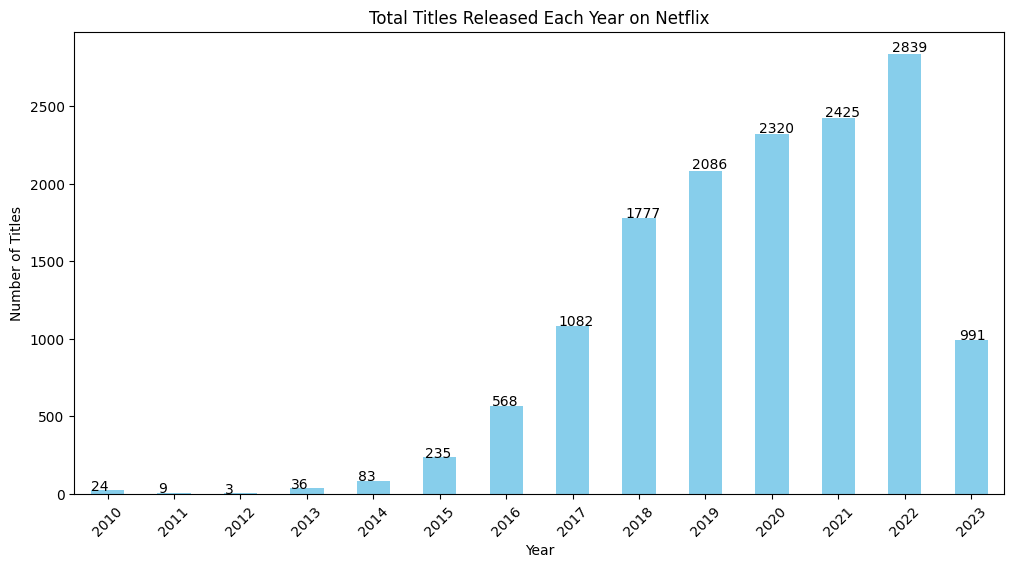

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cleaned_data_path = '/Users/paramanandbhat/Downloads/netflix_data_cleaned.csv'
netflix_df = pd.read_csv(cleaned_data_path)

#Convert 'Release Date' to Datetime
netflix_df['Release Date'] = pd.to_datetime(netflix_df['Release Date'])
#Extract the Year
netflix_df['Year'] = netflix_df['Release Date'].dt.year
#Aggregate Data by Year
titles_per_year = netflix_df.groupby('Year').size()
titles_per_year.index = titles_per_year.index.astype(int)
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(12, 6))
ax = titles_per_year.plot(kind='bar', color='skyblue')
plt.title('Total Titles Released Each Year on Netflix')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)

# Adding the text on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()




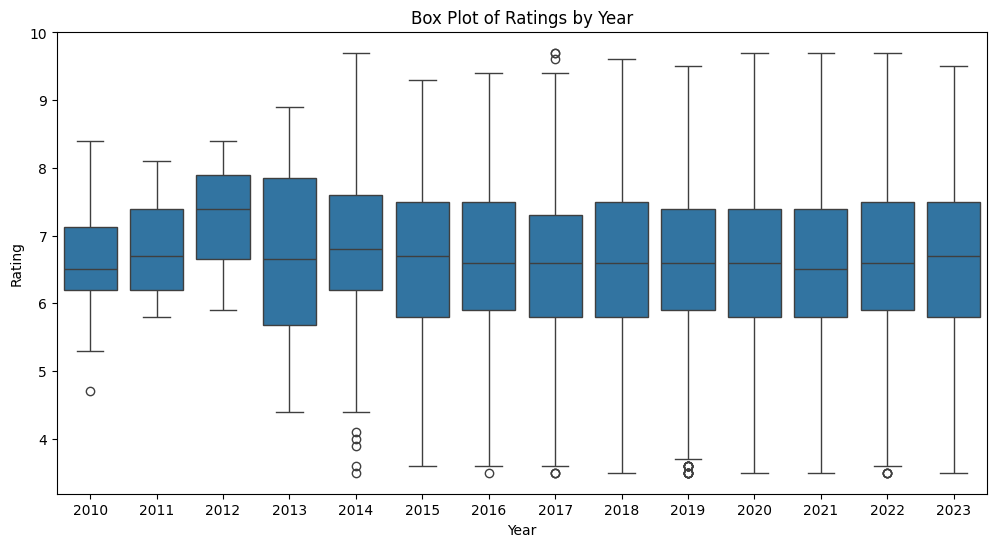

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt


cleaned_data_path = '/Users/paramanandbhat/Downloads/netflix_data_cleaned.csv'
netflix_df = pd.read_csv(cleaned_data_path)

netflix_df['Release Date'] = pd.to_datetime(netflix_df['Release Date'])
# Drop rows where 'Release Date' is NaN
netflix_df = netflix_df.dropna(subset=['Release Date'])

netflix_df['Year'] = netflix_df['Release Date'].dt.year.astype(int)


# Creating the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='Rating', data=netflix_df)
plt.title('Box Plot of Ratings by Year')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.show()


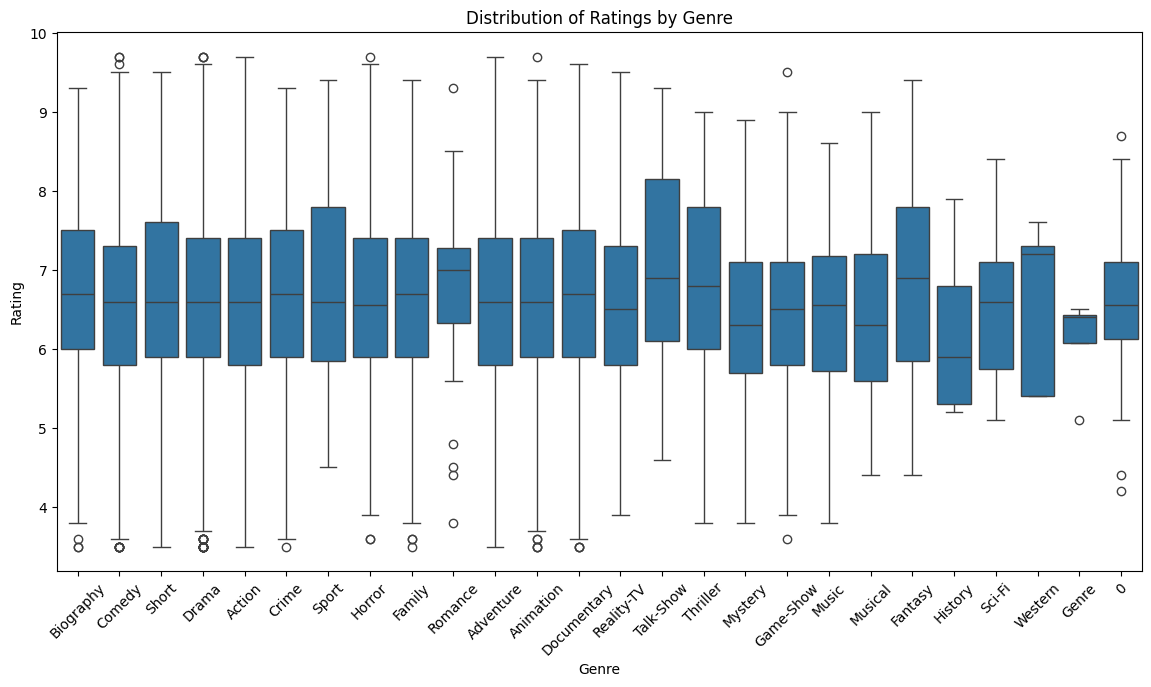

In [10]:
import pandas as pd
import ast

cleaned_data_path = '/Users/paramanandbhat/Downloads/netflix_data_cleaned.csv'
netflix_df = pd.read_csv(cleaned_data_path)

netflix_df['Genre'] = netflix_df['Genre'].apply(ast.literal_eval)  # Converts string to list
netflix_df['Primary Genre'] = netflix_df['Genre'].apply(lambda x: x[0] if isinstance(x, list) and x else 'Unknown')

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
sns.boxplot(x='Primary Genre', y='Rating', data=netflix_df)
plt.title('Distribution of Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()


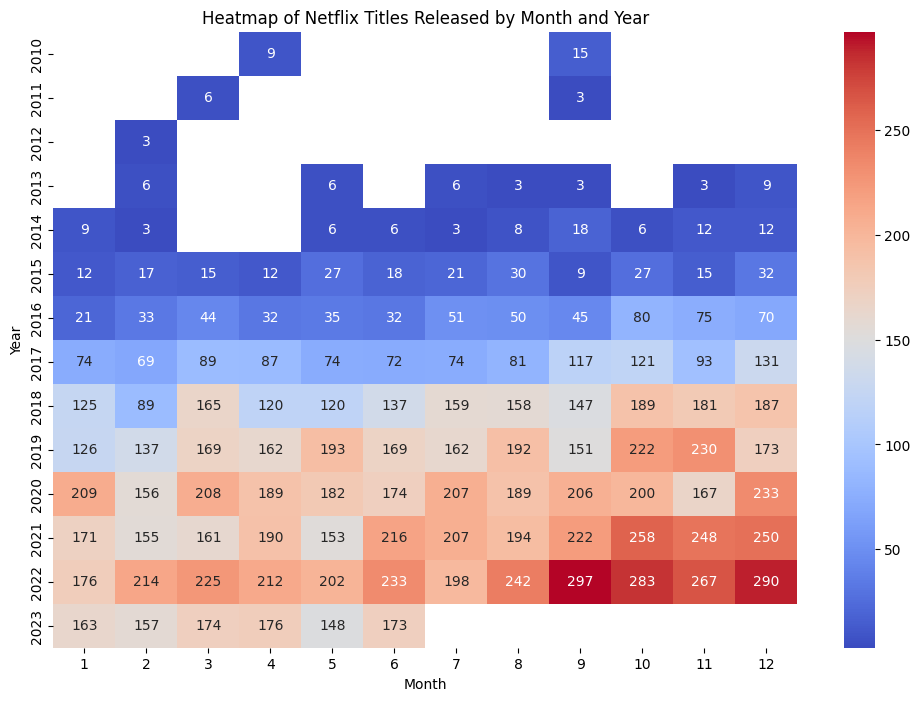

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cleaned_data_path = '/Users/paramanandbhat/Downloads/netflix_data_cleaned.csv'
netflix_df = pd.read_csv(cleaned_data_path)
# Drop rows where 'Release Date' is NaN
netflix_df = netflix_df.dropna(subset=['Release Date'])

# Convert 'Release Date' to datetime and extract year and month
netflix_df['Release Date'] = pd.to_datetime(netflix_df['Release Date'])
netflix_df['Year'] = netflix_df['Release Date'].dt.year.astype(int)  # Convert year to integer
netflix_df['Month'] = netflix_df['Release Date'].dt.month

# Create a pivot table for the heatmap
pivot_table = netflix_df.pivot_table(index='Year', columns='Month', values='Title', aggfunc='count')

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='g')
plt.title('Heatmap of Netflix Titles Released by Month and Year')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()


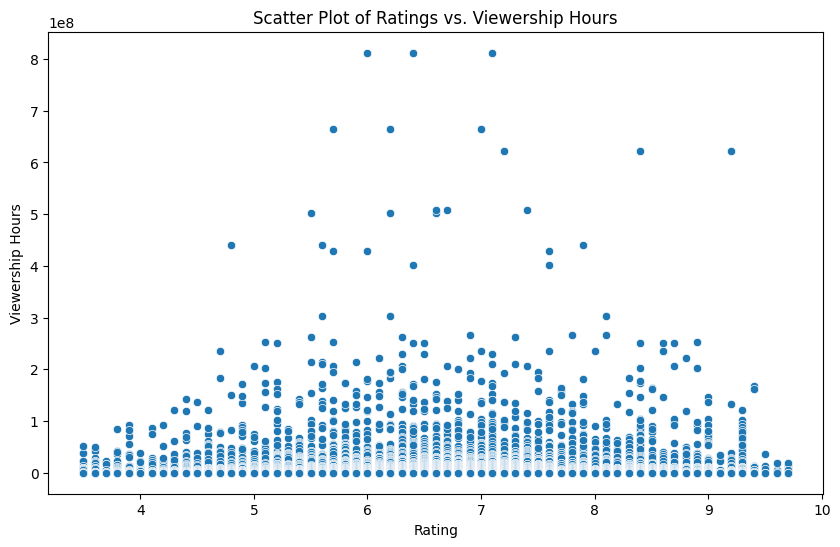

Correlation coefficient: 0.011991543083942239


In [12]:
import pandas as pd
import ast
import matplotlib.pyplot as plt

cleaned_data_path = '/Users/paramanandbhat/Downloads/netflix_data_cleaned.csv'
netflix_df = pd.read_csv(cleaned_data_path)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rating', y='Hours Viewed', data=netflix_df)
plt.title('Scatter Plot of Ratings vs. Viewership Hours')
plt.xlabel('Rating')
plt.ylabel('Viewership Hours')
plt.show()

correlation = netflix_df['Rating'].corr(netflix_df['Hours Viewed'])
print("Correlation coefficient:", correlation)


<Figure size 1200x800 with 0 Axes>

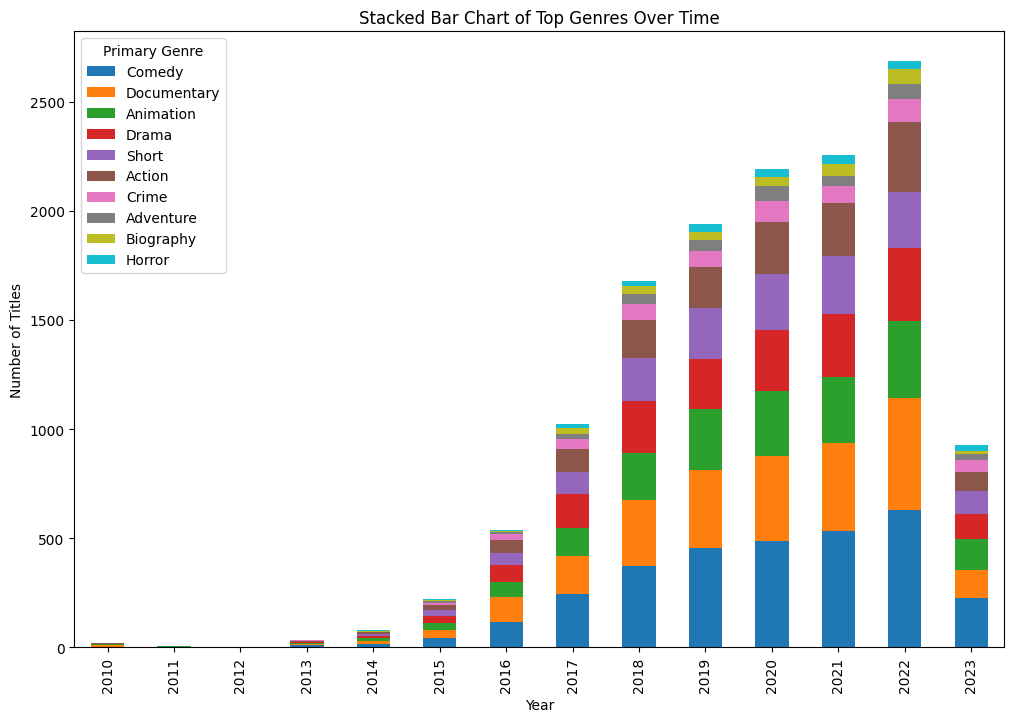

In [13]:
import pandas as pd
import ast
import matplotlib.pyplot as plt

cleaned_data_path = '/Users/paramanandbhat/Downloads/netflix_data_cleaned.csv'
netflix_df = pd.read_csv(cleaned_data_path)

netflix_df['Release Date'] = pd.to_datetime(netflix_df['Release Date'])
# Drop rows where 'Release Date' is NaN
netflix_df = netflix_df.dropna(subset=['Release Date'])

netflix_df['Year'] = netflix_df['Release Date'].dt.year.astype(int)

netflix_df['Genre'] = netflix_df['Genre'].apply(ast.literal_eval)

# Take only the first genre from the list to simplify
netflix_df['Primary Genre'] = netflix_df['Genre'].apply(lambda x: x[0] if x else 'Unknown')

# Now aggregate by year and primary genre
genre_yearly = netflix_df.groupby(['Year', 'Primary Genre']).size().unstack(fill_value=0)

# Optionally, you can focus on the top N genres
top_genres = netflix_df['Primary Genre'].value_counts().nlargest(10).index
genre_yearly_top = genre_yearly[top_genres]


# Plotting the simplified stacked bar chart
plt.figure(figsize=(12, 8))
genre_yearly_top.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Stacked Bar Chart of Top Genres Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.legend(title='Primary Genre')
plt.show()


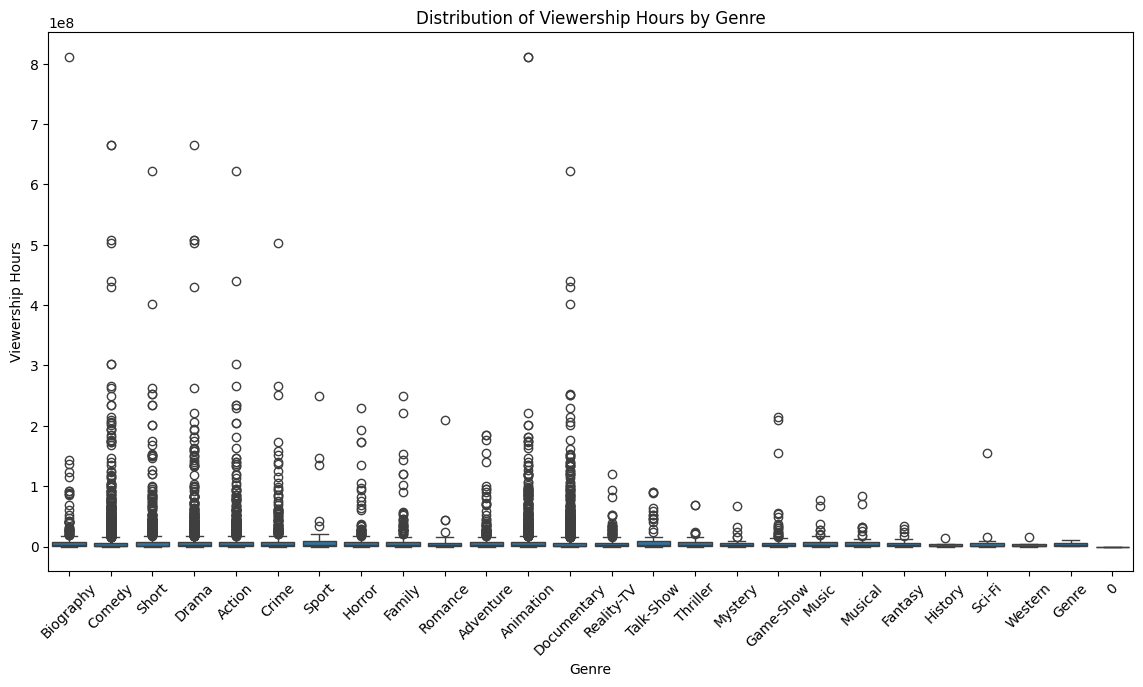

In [14]:
import pandas as pd
import ast

cleaned_data_path = '/Users/paramanandbhat/Downloads/netflix_data_cleaned.csv'
netflix_df = pd.read_csv(cleaned_data_path)

netflix_df['Genre'] = netflix_df['Genre'].apply(ast.literal_eval)  # Converts string to list
netflix_df['Primary Genre'] = netflix_df['Genre'].apply(lambda x: x[0] if isinstance(x, list) and x else 'Unknown')

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
sns.boxplot(x='Primary Genre', y='Hours Viewed', data=netflix_df)
plt.title('Distribution of Viewership Hours by Genre')
plt.xlabel('Genre')
plt.ylabel('Viewership Hours')
plt.xticks(rotation=45)
plt.show()


